# Perceptron (p)

### Imports

In [227]:
import numpy as np
from IPython.display import Image

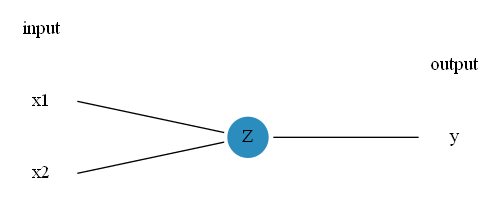

In [228]:
Image(filename='Perceptron.png')

$$z=w_1x_1+w_2x_2+b$$  
  
$$\text{Vectorization : } Z=X \cdot W+b$$  
\begin{equation*}
X =
\begin{bmatrix}x_{1}^{(1)} & \dots & x_{n}^{(1)}\\
\vdots & \ddots & \vdots\\
x_{1}^{(m)} & \dots & x_{n}^{(m)}
\end{bmatrix}
\in \mathbb{R}^{m \times n}
\space \space \space \space
W=
\begin{bmatrix}w_{1}\\
\vdots\\
w_{n}
\end{bmatrix}
\in \mathbb{R}^{n \times 1}
\space \space \space \space
b=
\begin{bmatrix}b\\
\vdots\\
b
\end{bmatrix}
\in \mathbb{R}^{m \times 1}
=b \in \mathbb{R}
\end{equation*}

https://www.youtube.com/watch?v=P6q_w-4H6pY  
https://moonbooks.org/Articles/How-to-plot-visualize-a-neural-network-in-python-using-Graphviz-/